<a href="https://colab.research.google.com/github/prajwaltimashetti/Data-Analysis/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving spotify_2023.csv to spotify_2023.csv


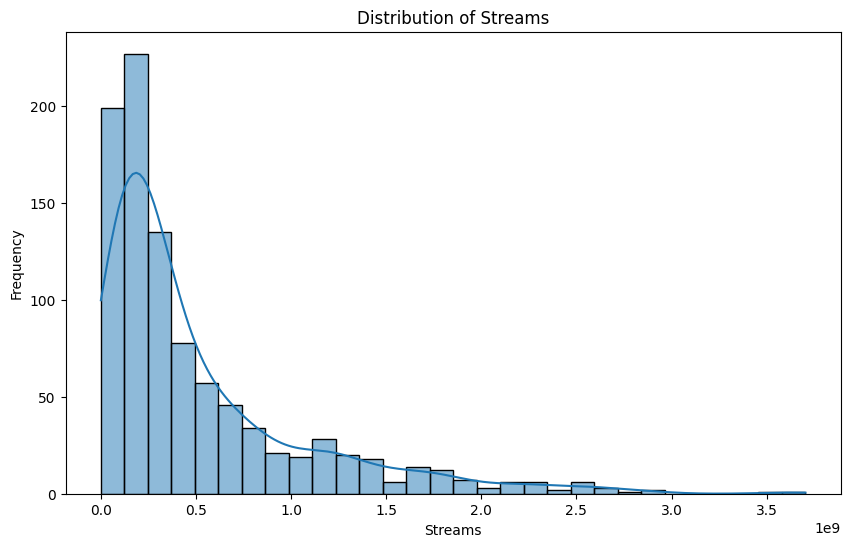

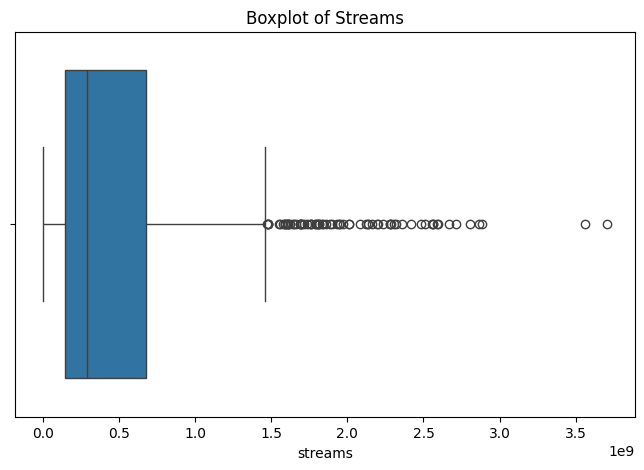

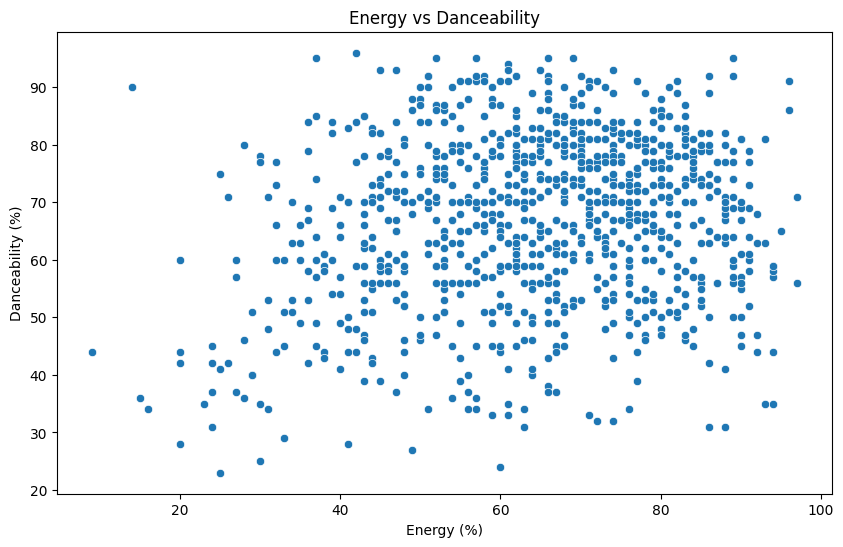

ValueError: could not convert string to float: 'Seven (feat. Latto) (Explicit Ver.)'

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)), encoding="ISO-8859-1")

# Convert relevant columns to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Univariate Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['streams'].dropna(), bins=30, kde=True)
plt.title("Distribution of Streams")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()

# Boxplot for streams
plt.figure(figsize=(8,5))
sns.boxplot(x=df['streams'].dropna())
plt.title("Boxplot of Streams")
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['energy_%'], y=df['danceability_%'])
plt.title("Energy vs Danceability")
plt.xlabel("Energy (%)")
plt.ylabel("Danceability (%)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Saving pcos_dataset.csv to pcos_dataset (3).csv
Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB

First 5 Rows:
    Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
0   24  34.7                       1                       25.2   
1   37  26.4                       0                       57.1   
2   32  23.6                       0                       92.7   
3   28  28.8                       0      

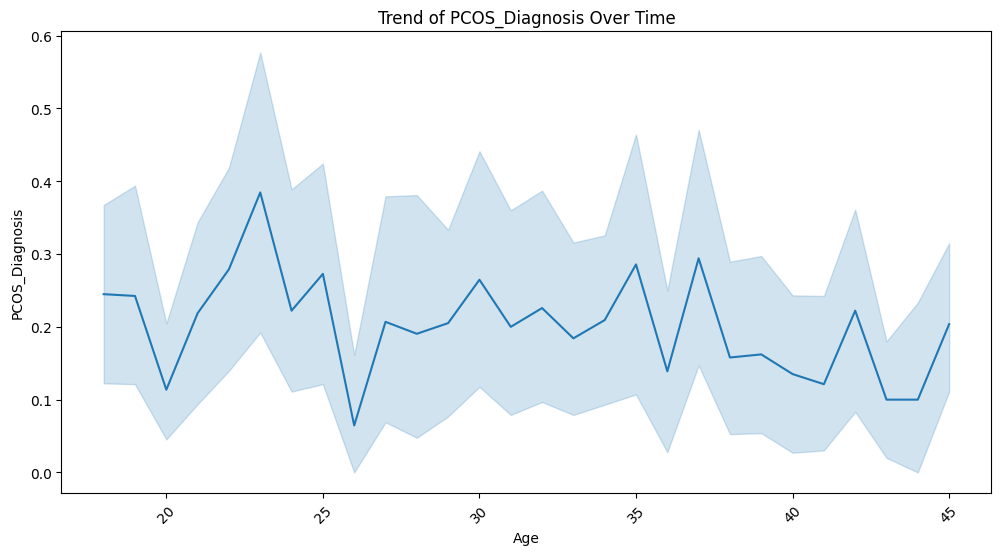

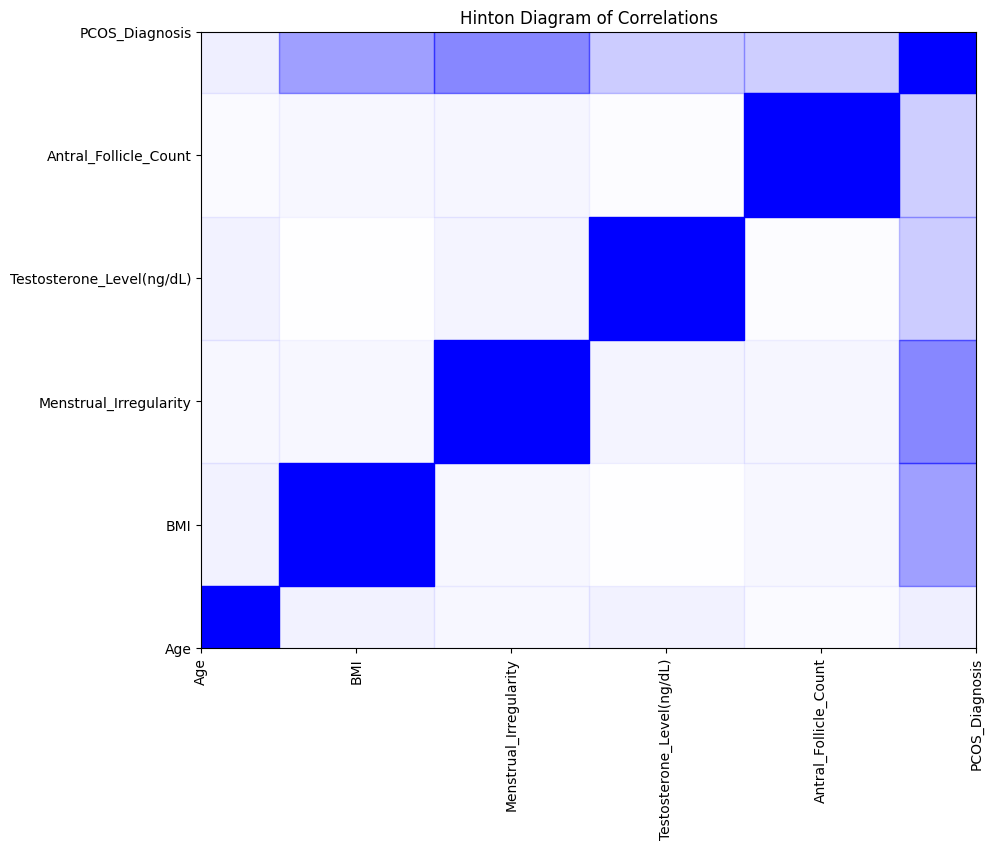

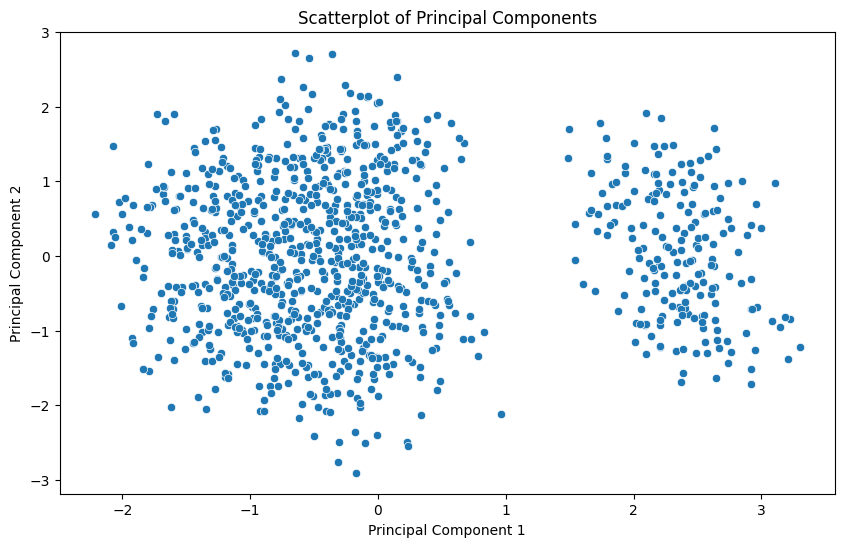

Skipping LDA: No categorical variables found.


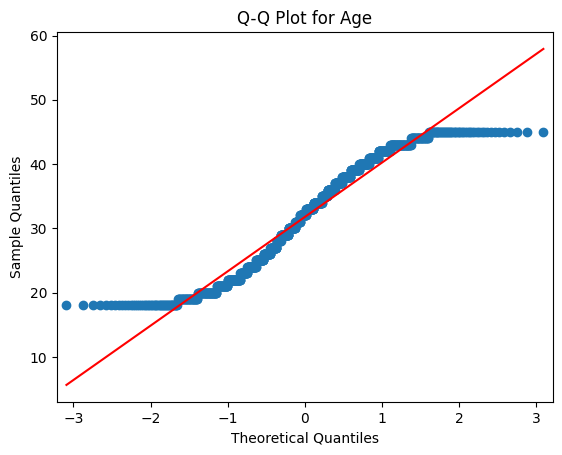

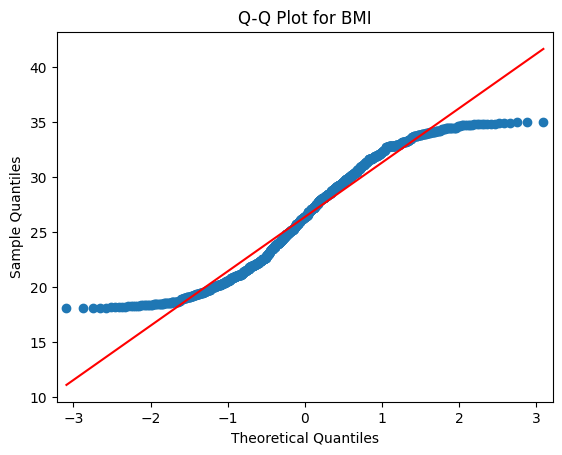

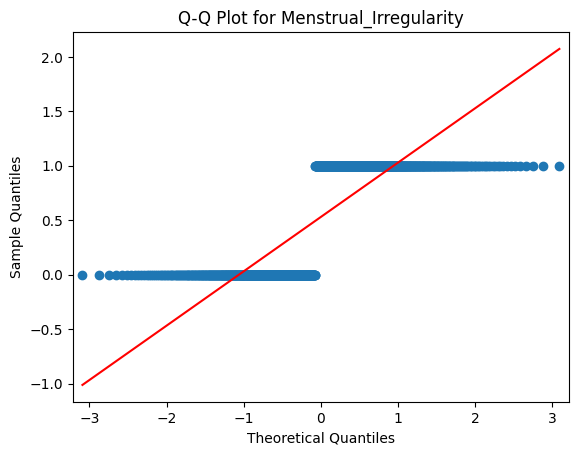

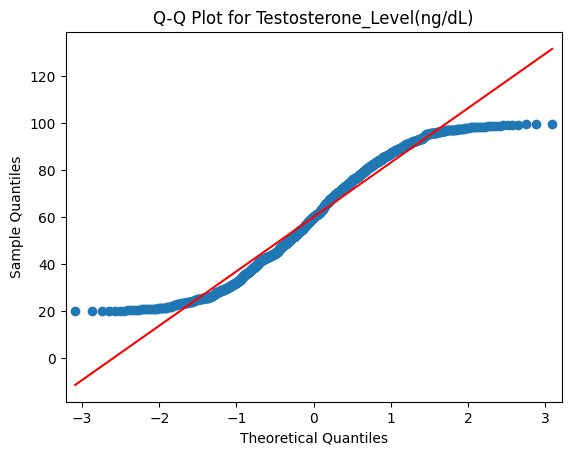

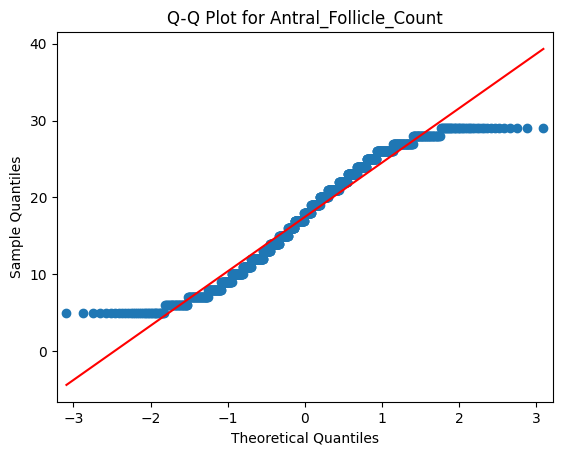

Skipping ANOVA: No categorical variables found.
Exploratory Data Analysis (EDA) completed successfully!


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import statsmodels.api as sm
from scipy import stats

# Upload the CSV file
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# Display dataset information
print("Dataset Information:\n")
df.info()
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
# Numeric columns: Fill with mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Categorical columns: Fill with mode
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Univariate Analysis
print("\nSummary Statistics:\n", df.describe())

# Proportional bar chart
if len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        (df[col].value_counts() / len(df)).plot(kind='bar', color='skyblue')
        plt.title(f"Proportional Distribution of {col}")
        plt.show()

# Line Chart for Trends
time_col = 'date' if 'date' in df.columns else numeric_columns[0]
plt.figure(figsize=(12, 6))
sns.lineplot(x=df[time_col], y=df[numeric_columns[-1]])
plt.title(f"Trend of {numeric_columns[-1]} Over Time")
plt.xticks(rotation=45)
plt.show()

# Means and variances per group
if len(categorical_columns) > 0:
    print("\nMeans and Variances per Group:\n", df.groupby(categorical_columns[0])[numeric_columns].agg(['mean', 'var']))

    # Between-group and Within-group variance
    for col in numeric_columns:
        between_groups_var = df.groupby(categorical_columns[0])[col].mean().var()
        within_groups_var = df.groupby(categorical_columns[0])[col].var().mean()
        print(f"Between-Groups Variance for {col}: {between_groups_var}")
        print(f"Within-Groups Variance for {col}: {within_groups_var}")

# Hinton Diagram
plt.figure(figsize=(10,8))
for x in range(len(numeric_columns)):
    for y in range(len(numeric_columns)):
        plt.gca().add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='blue', alpha=abs(df[numeric_columns].corr().iloc[x, y])))
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=90)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.title("Hinton Diagram of Correlations")
plt.show()

# Standardizing Variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Principal Component Analysis
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1])
plt.title("Scatterplot of Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Linear Discriminant Analysis (only if categorical columns exist)
if len(categorical_columns) > 0:
    lda = LDA(n_components=1)
    lda_components = lda.fit_transform(scaled_data, df[categorical_columns[0]])
    plt.figure(figsize=(10,6))
    sns.histplot(lda_components, bins=30, kde=True)
    plt.title("Separation Achieved by Discriminant Functions")
    plt.xlabel("LDA Component")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Skipping LDA: No categorical variables found.")

# Q-Q plots
for col in numeric_columns[:5]:
    sm.qqplot(df[col].dropna(), line='s')
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

# T-tests & ANOVA
if len(categorical_columns) > 0:
    for col in numeric_columns:
        groups = [group.dropna().values for _, group in df.groupby(categorical_columns[0])[col]]
        anova_result = stats.f_oneway(*groups)
        print(f"ANOVA result for {col}: {anova_result}")
else:
    print("Skipping ANOVA: No categorical variables found.")

print("Exploratory Data Analysis (EDA) completed successfully!")


Saving spotify_2023.csv to spotify_2023.csv
Summary Statistics:
        artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.520000e+02   
mean            5200.124869          12.009444  5.141374e+08   
std             7897.608990          19.575992  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25

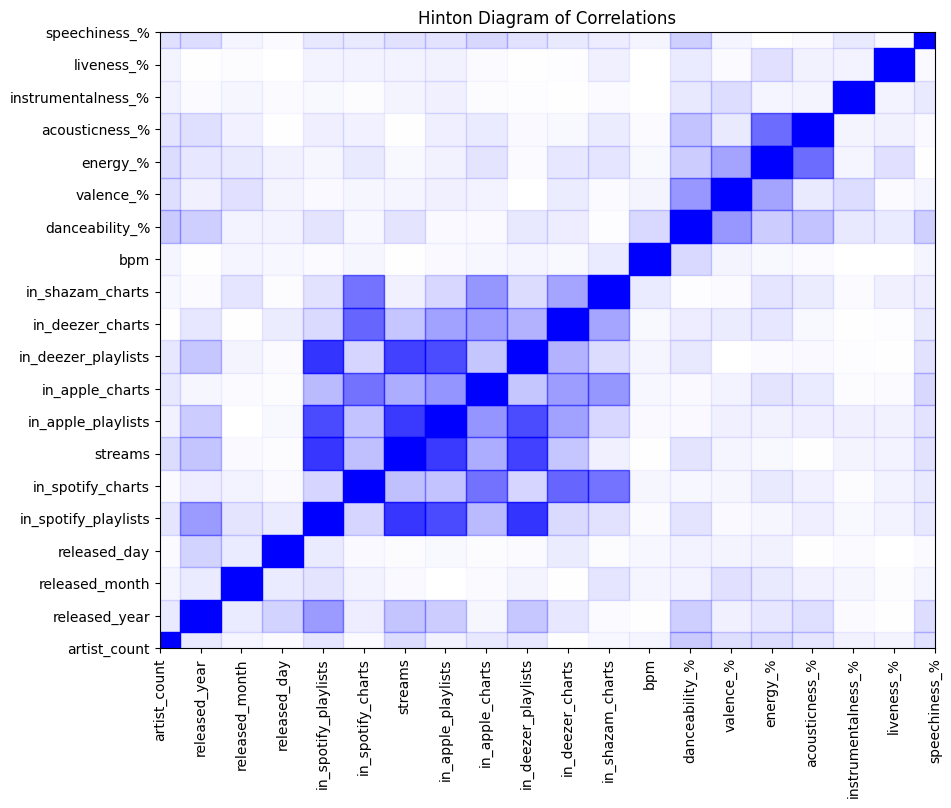

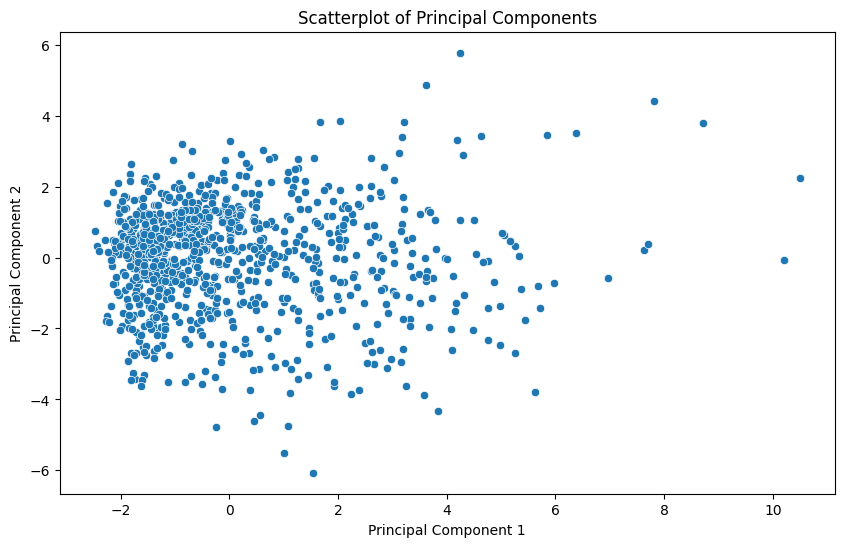

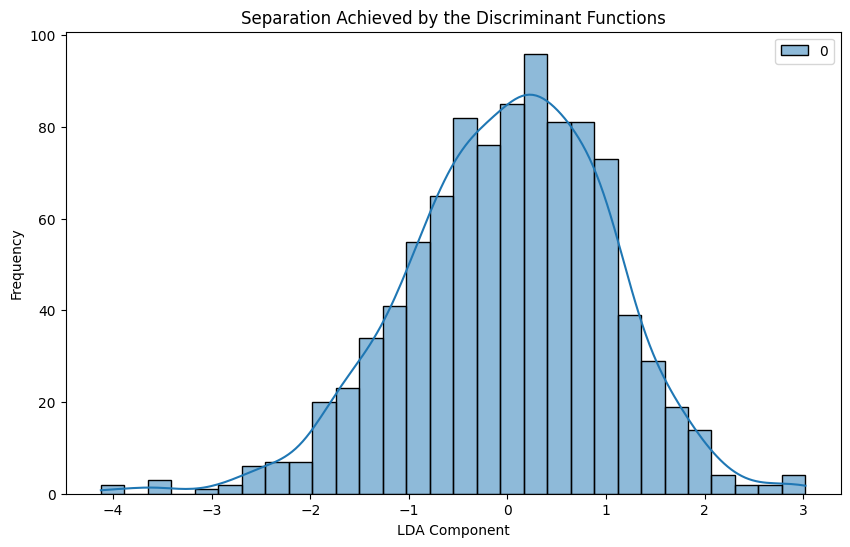

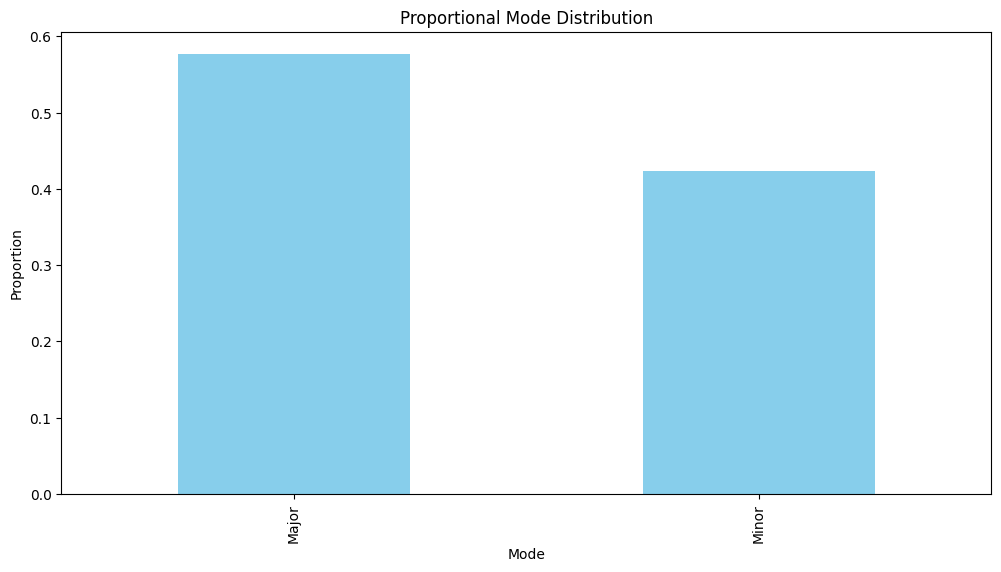

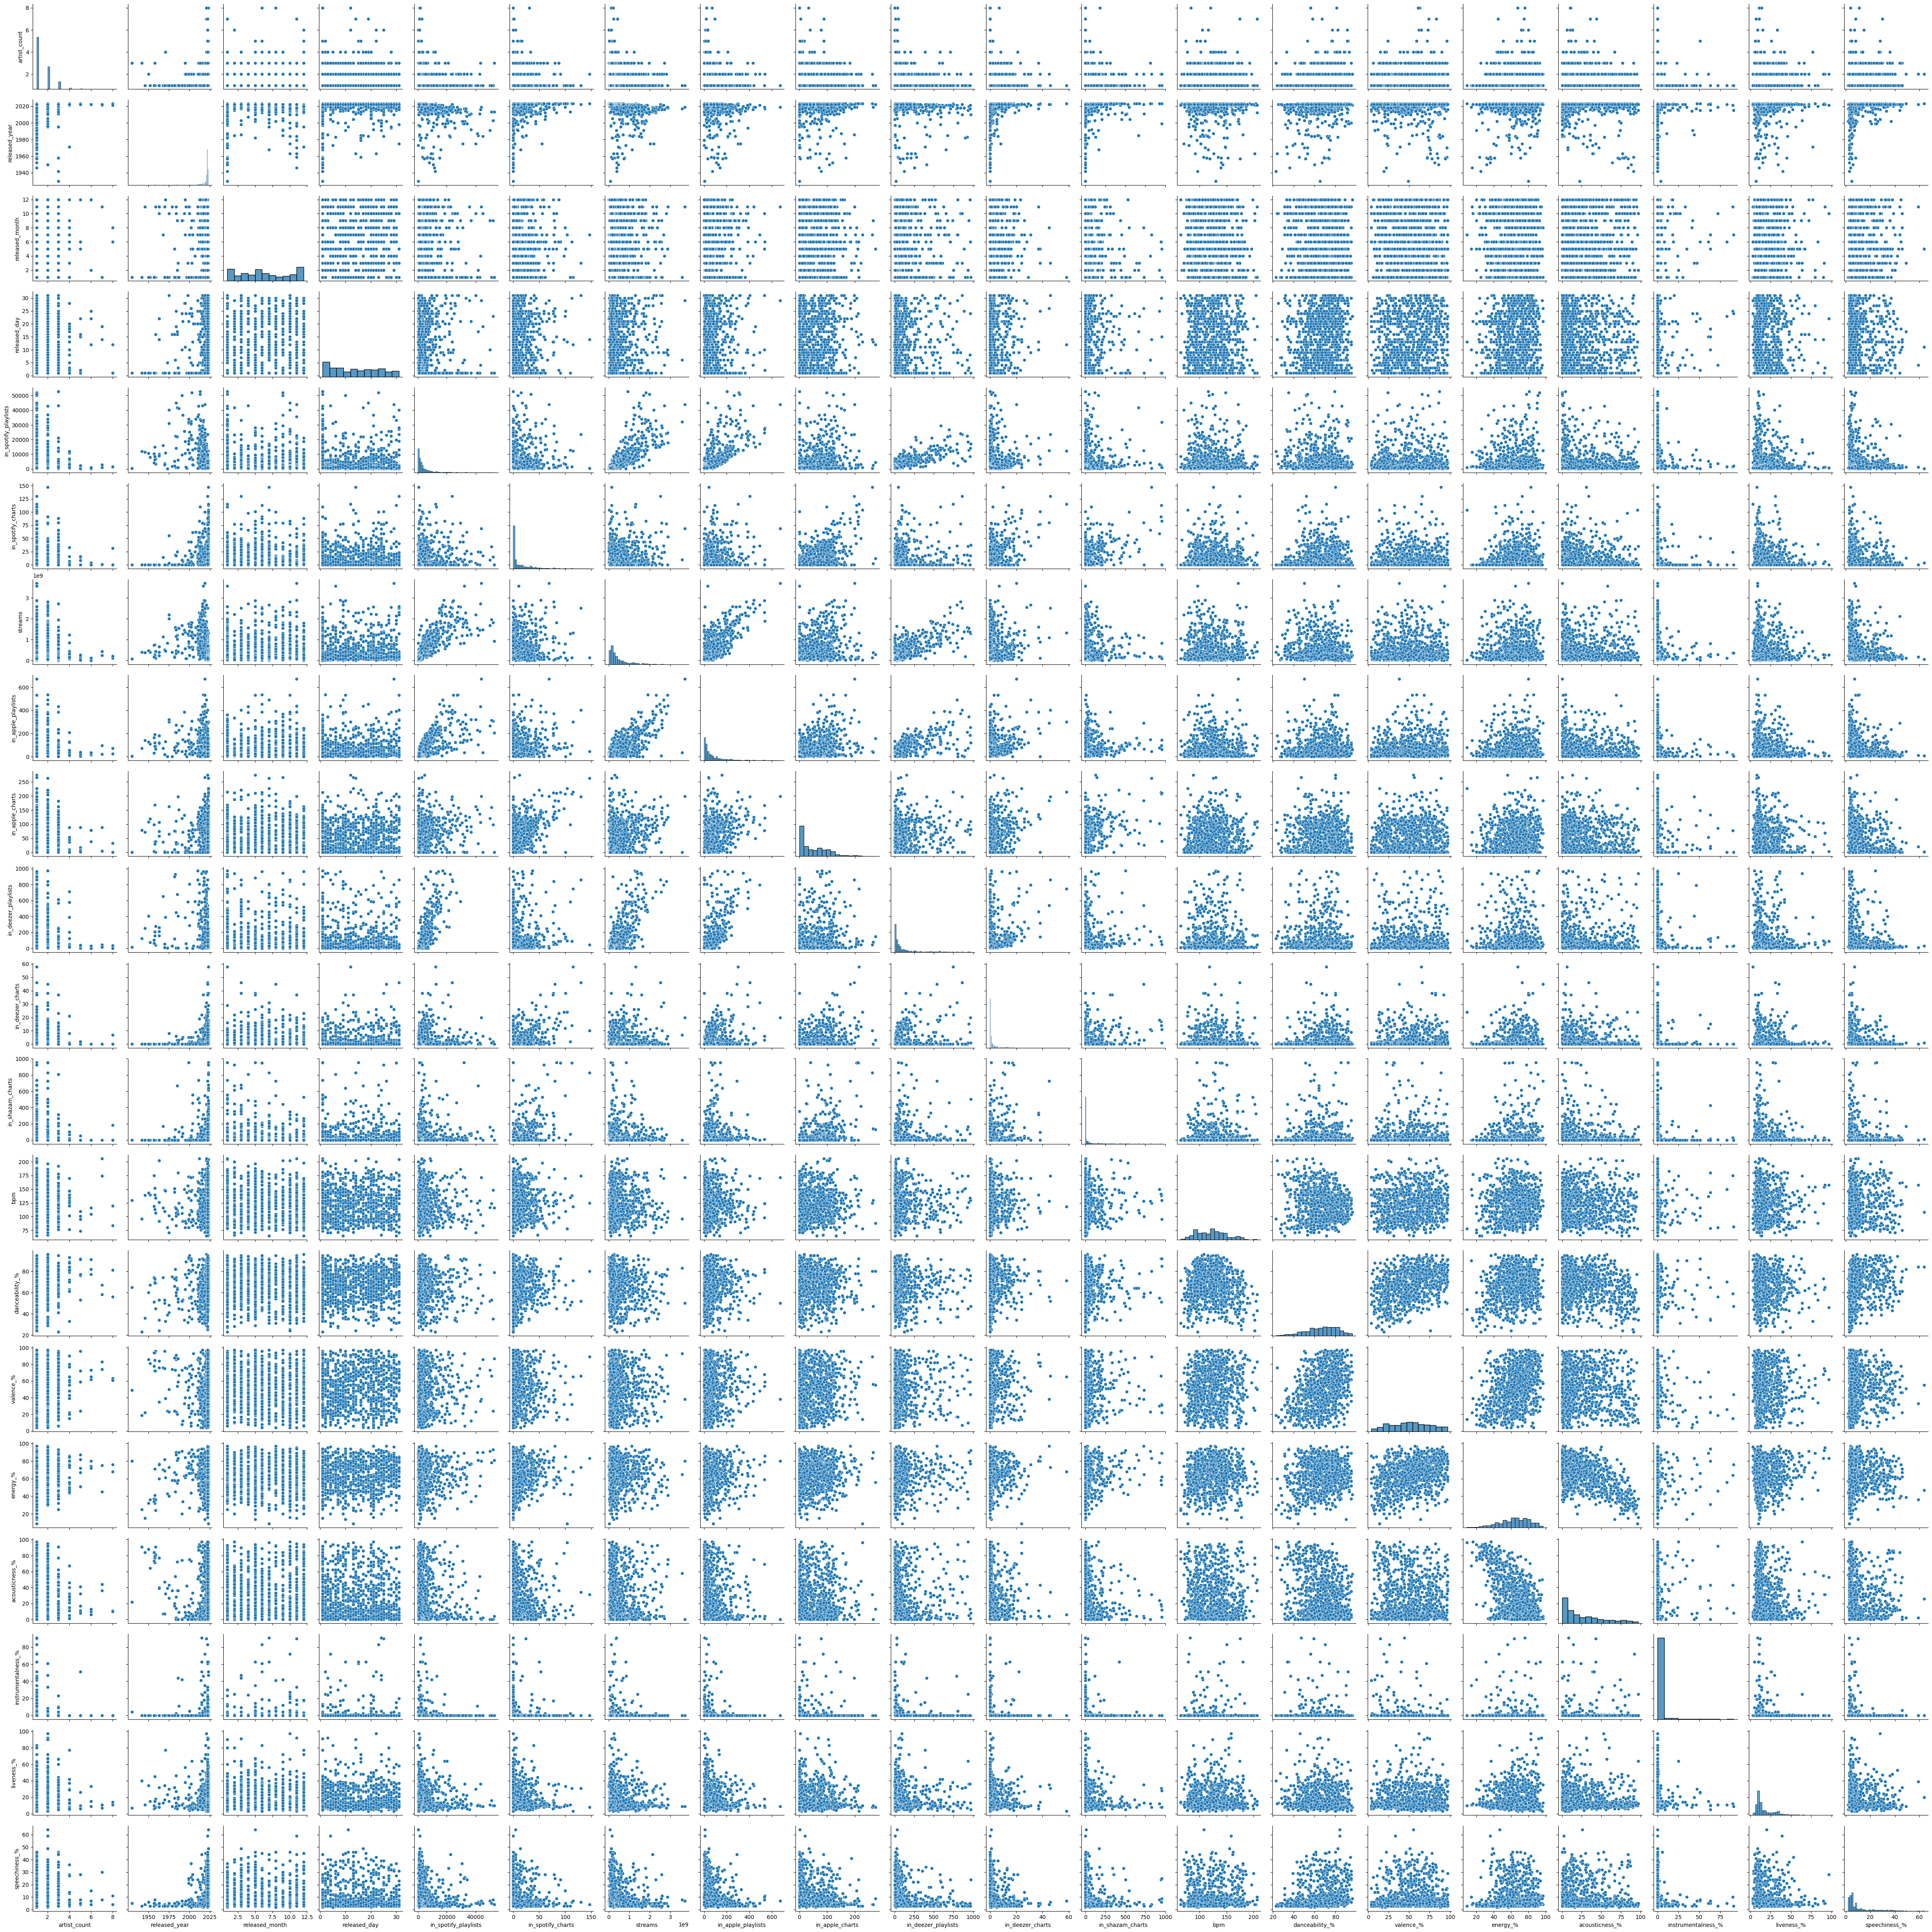

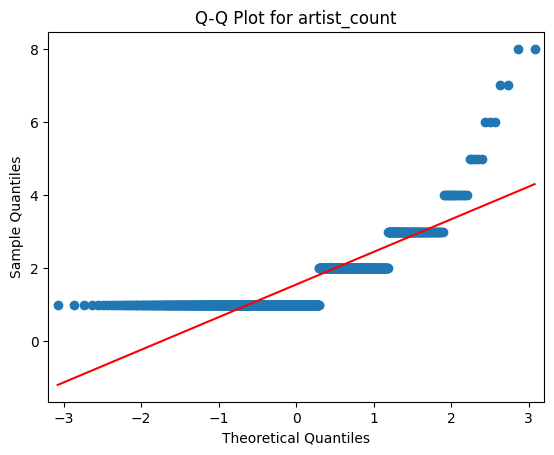

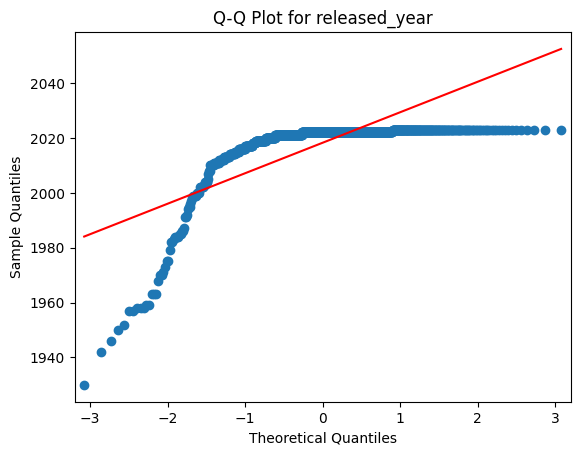

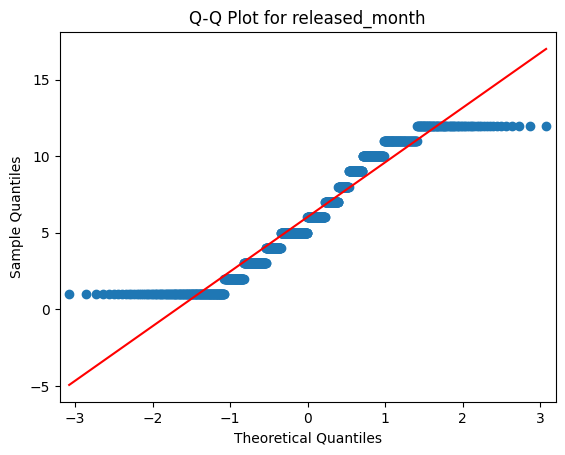

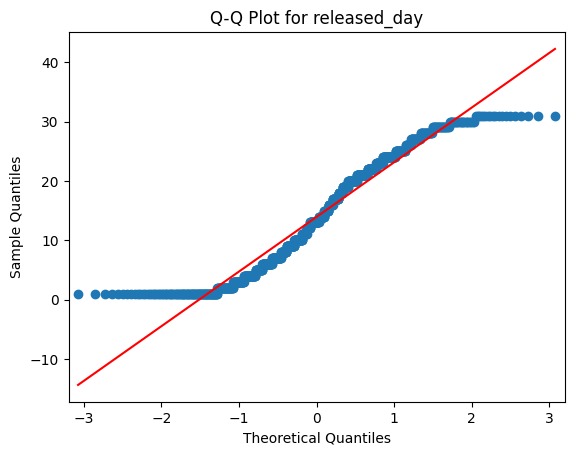

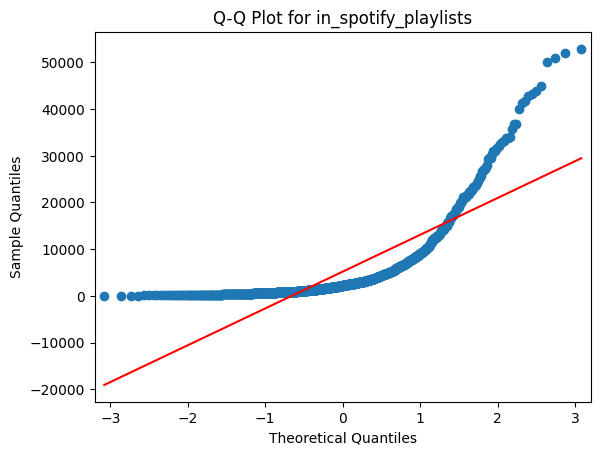

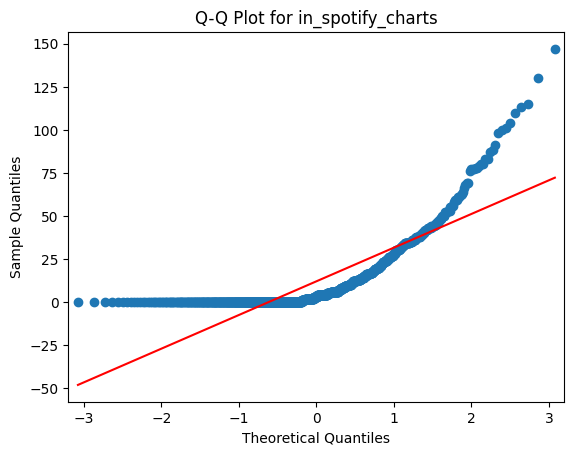

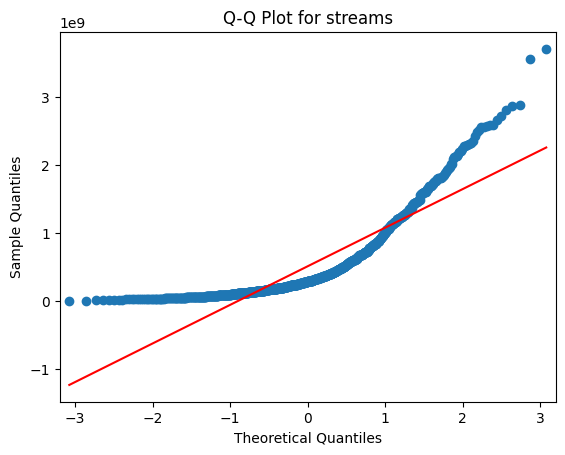

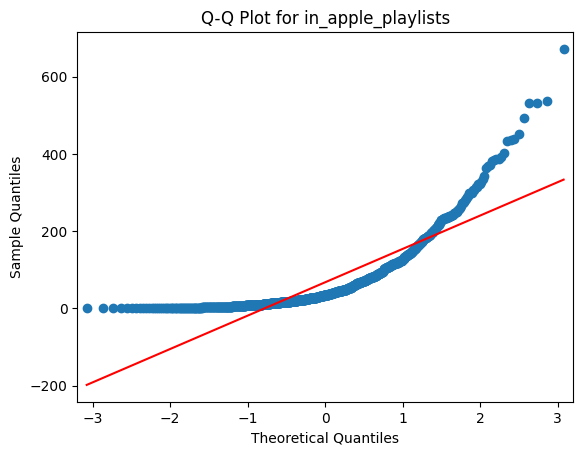

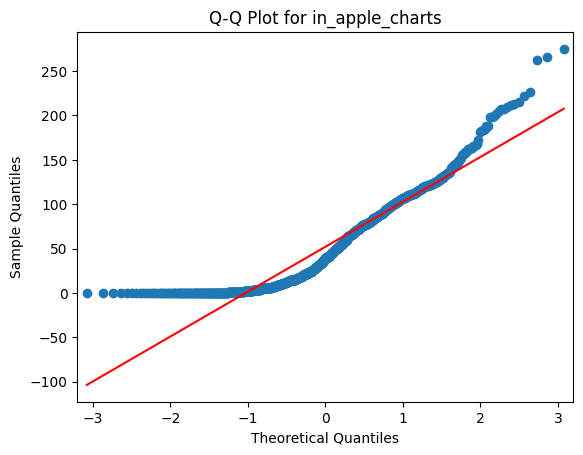

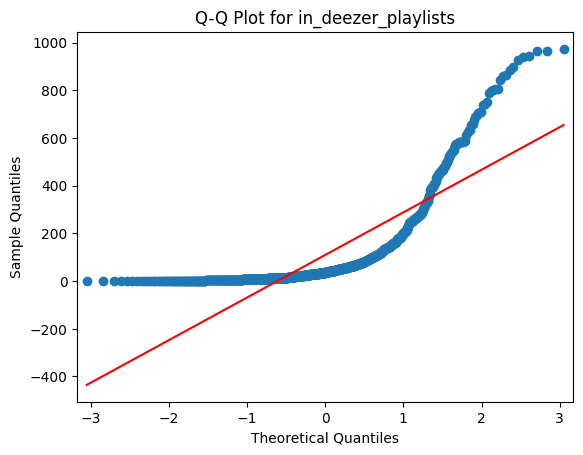

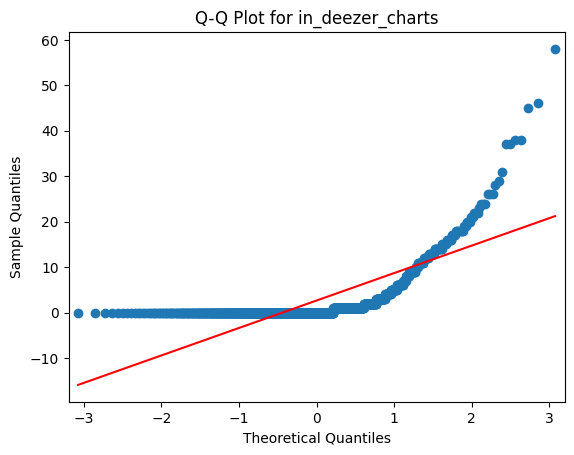

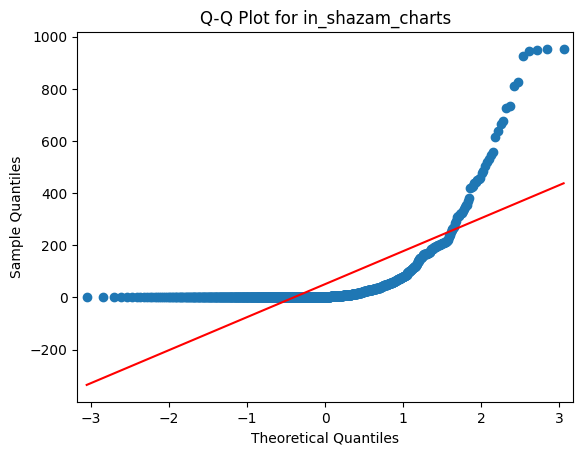

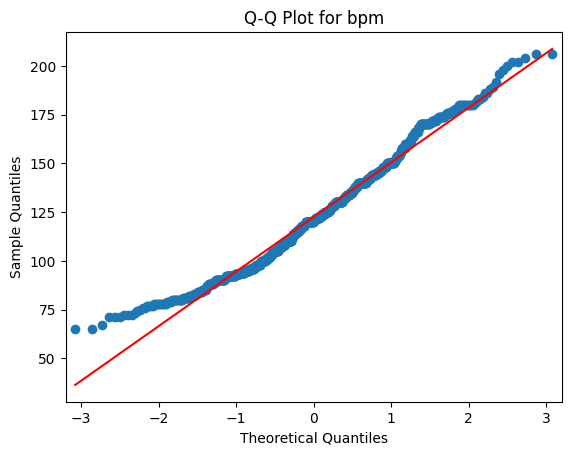

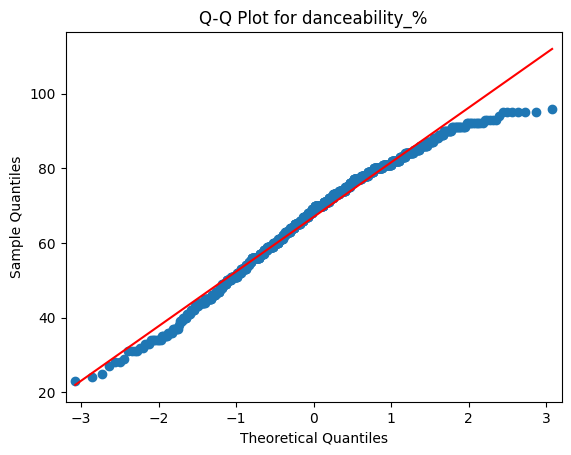

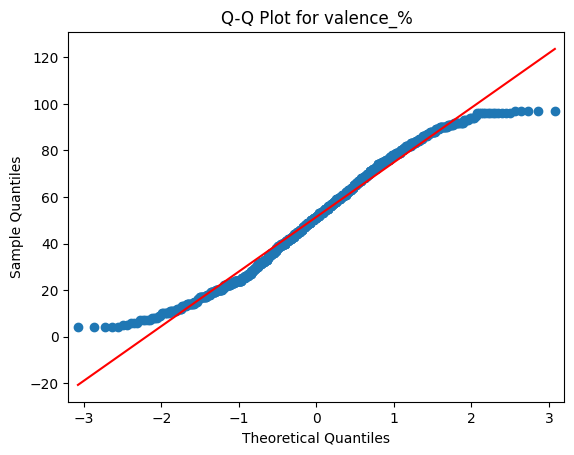

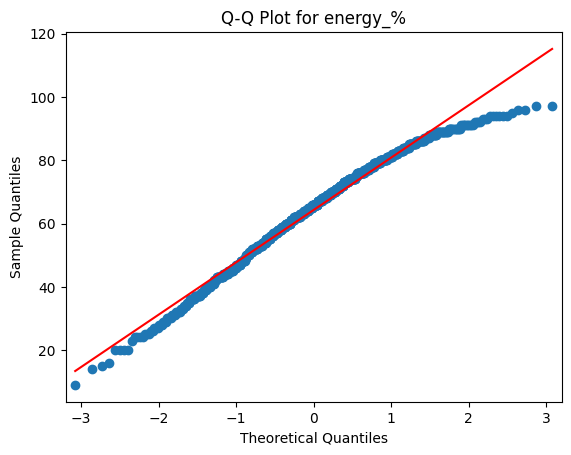

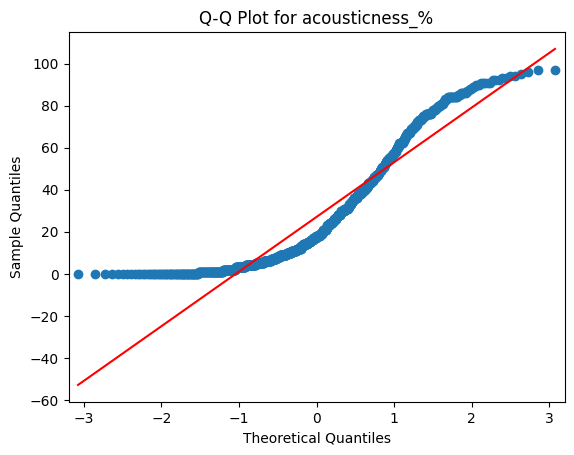

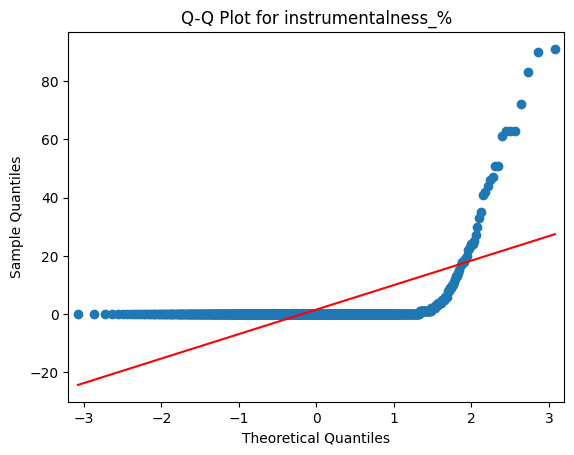

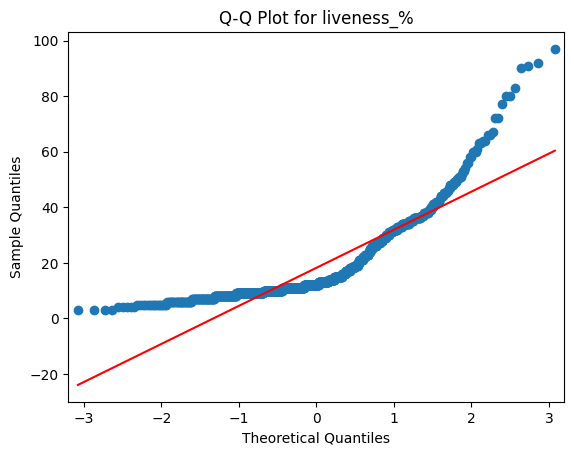

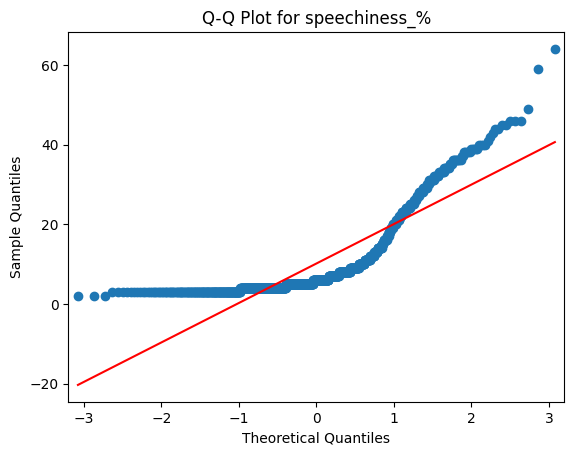

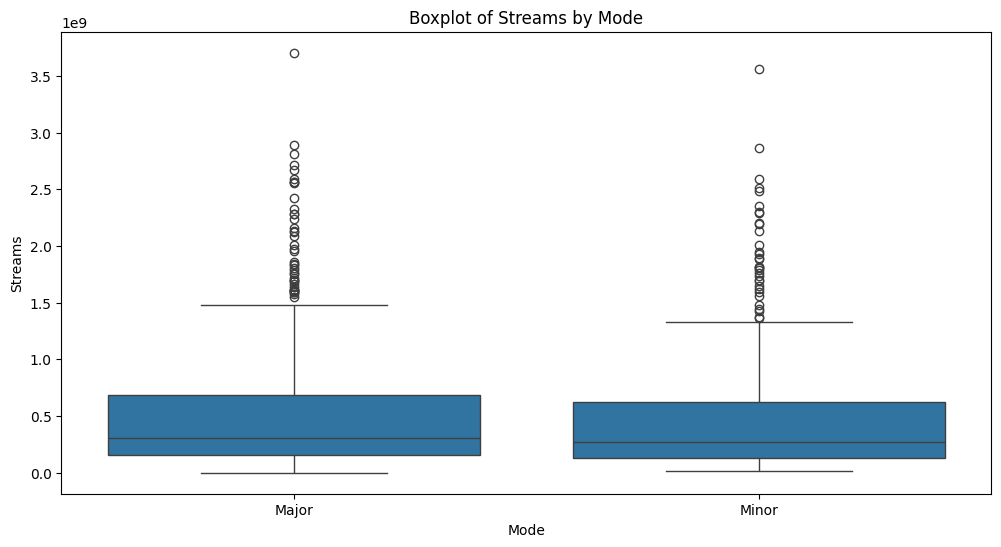

ANOVA result for Streams across Modes: F_onewayResult(statistic=1.7299631225287038, pvalue=0.18873296987459368)


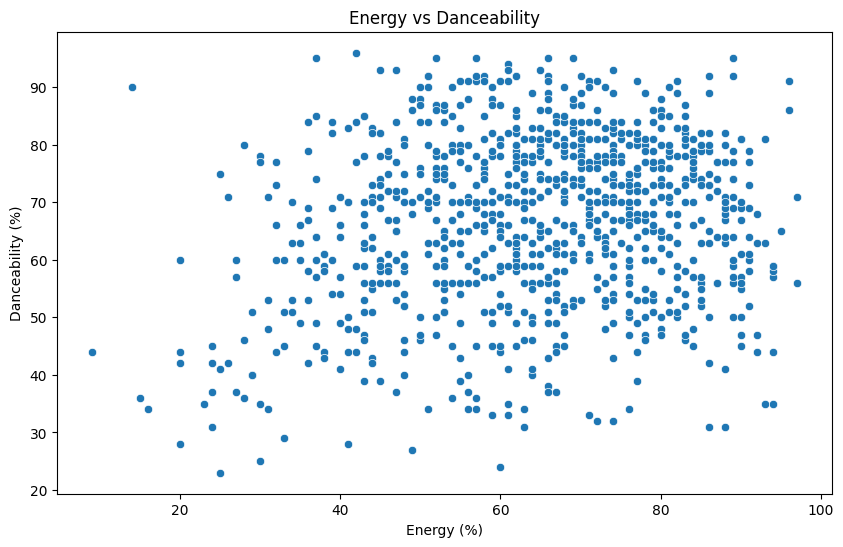

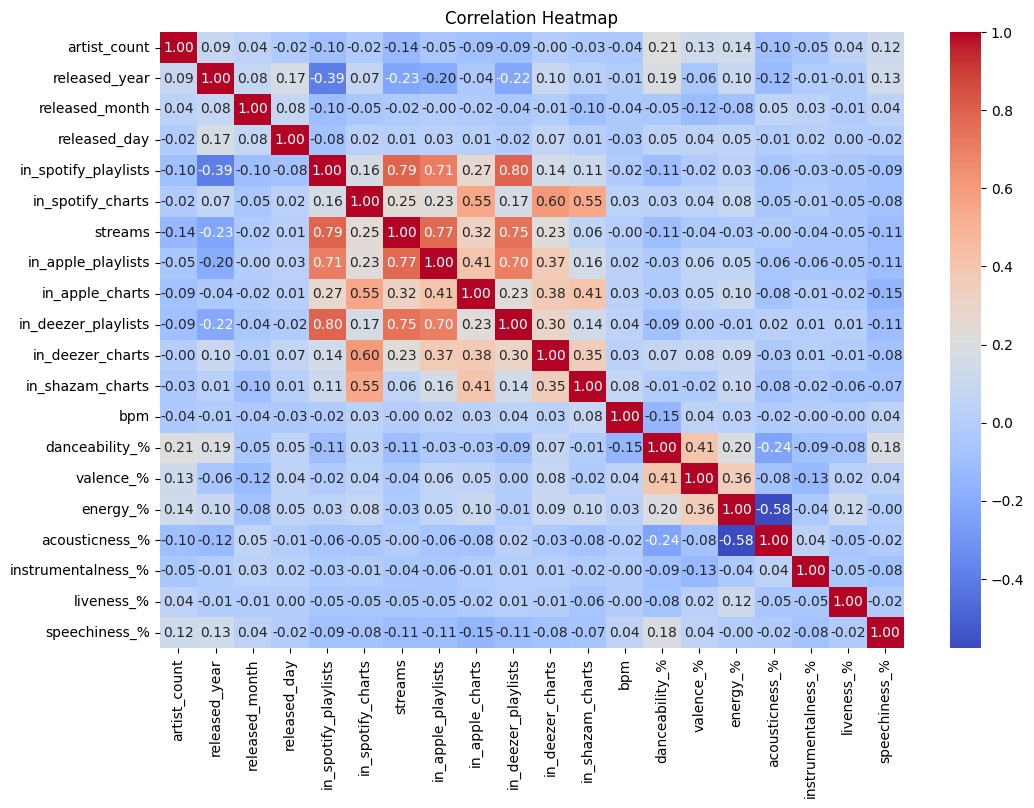

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer
from scipy import stats
import statsmodels.api as sm

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)), encoding="ISO-8859-1")

# Convert relevant columns to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Summary statistics for multivariate data
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Means and variances per group (only numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns
grouped_stats = df.groupby('mode')[numeric_columns].agg(['mean', 'var'])
print("Means and Variances per Group:\n", grouped_stats)

# Between-groups variance and Within-groups variance for a variable
variable = 'streams'
if variable in numeric_columns:
    between_groups_var = df.groupby('mode')[variable].mean().var()
    within_groups_var = df.groupby('mode')[variable].var().mean()
    print(f"Between-Groups Variance for {variable}: {between_groups_var}")
    print(f"Within-Groups Variance for {variable}: {within_groups_var}")
else:
    print(f"Variable '{variable}' is not numeric and cannot be analyzed for variance.")

# Correlations for Multivariate Data
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Hinton Diagram
fig, ax = plt.subplots(figsize=(10,8))
for x in range(correlation_matrix.shape[0]):
    for y in range(correlation_matrix.shape[1]):
        plt.gca().add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='blue', alpha=np.abs(correlation_matrix.iloc[x, y])))
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Hinton Diagram of Correlations")
plt.show()

# Standardising Variables and Handling Missing Values
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')
scaled_data = scaler.fit_transform(imputer.fit_transform(df[numeric_columns]))

# Principal Component Analysis
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1])
plt.title("Scatterplot of Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Linear Discriminant Analysis
lda = LDA(n_components=1)
lda_components = lda.fit_transform(scaled_data, df['mode'])
plt.figure(figsize=(10,6))
sns.histplot(lda_components, bins=30, kde=True)
plt.title("Separation Achieved by the Discriminant Functions")
plt.xlabel("LDA Component")
plt.ylabel("Frequency")
plt.show()

# Proportional bar chart for categorical data
plt.figure(figsize=(12,6))
(df['mode'].value_counts() / len(df)).plot(kind='bar', color='skyblue')
plt.title("Proportional Mode Distribution")
plt.xlabel("Mode")
plt.ylabel("Proportion")
plt.show()

# Scatter Matrix Plot (Pairplot)
sns.pairplot(df[numeric_columns])
plt.show()

# Q-Q plots for normality check
for col in numeric_columns:
    sm.qqplot(df[col].dropna(), line='s')
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

# Boxplots for categorical vs numerical variables
plt.figure(figsize=(12,6))
sns.boxplot(x=df['mode'], y=df['streams'])
plt.title("Boxplot of Streams by Mode")
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.show()

# T-test and ANOVA for statistical comparisons
groups = [group.dropna().values for _, group in df.groupby('mode')['streams']]
anova_result = stats.f_oneway(*groups)
print("ANOVA result for Streams across Modes:", anova_result)

# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['energy_%'], y=df['danceability_%'])
plt.title("Energy vs Danceability")
plt.xlabel("Energy (%)")
plt.ylabel("Danceability (%)")
plt.show()

# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()